<a href="https://colab.research.google.com/github/heejjj/Health_Bio_AI/blob/bio_colab/0329_opencv_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

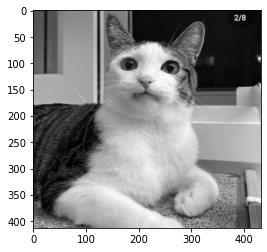

In [ ]:
img = cv2.imread('hoseb2.png')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap ='gray')

In [ ]:
img = img.astype(int)

In [ ]:
#3차원
height, width, channel = img.shape
print("Height = %d , Width = %d" % (height, width))
print("Channel = %d" % channel)
print("Data type = %s" % img.dtype)

Height = 413 , Width = 432
Channel = 3
Data type = uint8


In [ ]:
img.shape #color값 shape

(413, 432, 3)

In [ ]:
img.shape #gray값 shape

(413, 432)

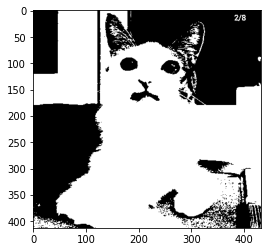

In [ ]:
height, width = img.shape
res = np.zeros((height, width), dtype = 'uint8')
trans_f = np.zeros(256, dtype='uint8')

#trans_f 함수 0-255개를 가진 array 

for i in range(256):
  if (i <100):
    trans_f[i] = 0  #i<100작으면 0 
  else:
    trans_f[i]= 1

for i in range(height):   #i, j 각 필셀에 적용 
  for j in range(width):
    res[i,j] = trans_f[img[i,j]]

plt.imshow(res, cmap='gray')

#if값을 쓰지 않는 이유는 for,if문이 많이 들어가면 연산이 길어지므로 함수를 만들어서 적용

In [ ]:
height, width = img.shape
res = np.zeros((height, width), dtype='uint8')
trans_f = np.zeros(256, dtype='uint8')

for i in range(256):
    if(i < 100):
        trans_f[i] = 0
    else:
        trans_f[i] = i
        
for i in range(height):
    for j in range(width):
      res[i, j] = trans_f[img[i, j]]
        
plt.imshow(res, cmap='gray')

IndexError: ignored

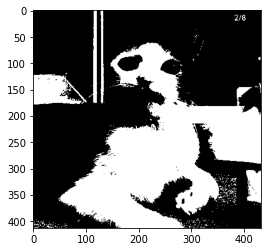

In [ ]:
#

height, width = img.shape
res = np.zeros((height, width), dtype='uint8')
trans_f = np.zeros(256, dtype='uint8')

Th = 150 #Threshold 문턱 값

for i in range(256):
  if(i< Th):
    trans_f[i] = 0
  else:
    trans_f[i] = 255
        
for i in range(height):
  for j in range(width):
    res[i, j] = trans_f[img[i, j]]
        
plt.imshow(res, cmap='gray')

#실습 

1. Gamma correction (gamma = 0.5, 2)
2. Contrast stretching (50,50) and (100,200)
3. Gray-level slicing (100<i<200 -> 200)
4. Histogram equalization 


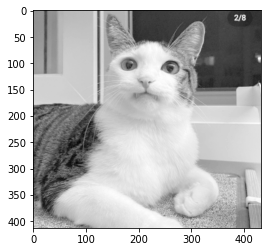

In [ ]:
#Gamma correction (빛의 intensit신호를 비선형적으로 변형하는 것)
#다양한 모니터의 비선형 반응을 보정학 위해사용
#인간의 시각적인 부분에서 밝은 색 지역 보다 어두운색 지역의 변화에 민감하기 때문에
#어두운 지역의 정밀도를 높이기 위해 사용

height, width = img.shape
res = np.zeros((height, width), dtype='uint8')
trans_f = np.zeros(256, dtype='uint8')

################################################
gamma = 0.5

for i in range(256):
    trans_f[i] = 255 * ((i/255)**gamma)
#################################################
        
for i in range(height):
  for j in range(width):
    res[i, j] = trans_f[img[i, j]]
        
plt.imshow(res, cmap='gray')

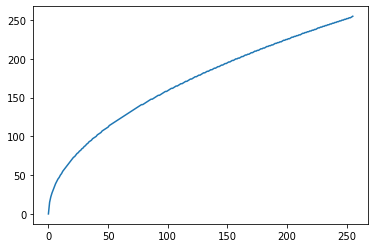

In [ ]:
plt.plot(trans_f)

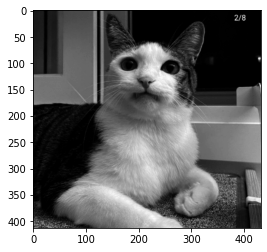

In [ ]:
height, width = img.shape
res = np.zeros((height, width), dtype='uint8')
trans_f = np.zeros(256, dtype='uint8')

################################################
gamma = 2

for i in range(256):
    trans_f[i] = 255 * ((i/255)**gamma)
#################################################
        
for i in range(height):
  for j in range(width):
    res[i, j] = trans_f[img[i, j]]
        
plt.imshow(res, cmap='gray')

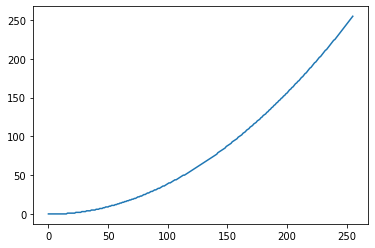

In [ ]:
plt.plot(trans_f)

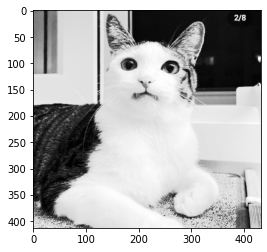

In [ ]:
#Contrast streching 3개의 직선이 나옴
#(0,0) -> (50,50) -> (100,200)
#조건 Contrast stretching (50,50) and (100,200)
height, width = img.shape
res = np.zeros((height, width), dtype='uint8')
trans_f = np.zeros(256, dtype='uint8')


##################################################
for i in range(256):
    if(i < 50):
        trans_f[i] = i
    elif(i < 100):
        trans_f[i] = 3*i - 100
    else:
        trans_f[i] = 55 / 155 * (i-100) + 200
###################################################
        
for i in range(height):
    for j in range(width):
      res[i, j] = trans_f[img[i, j]]
        
plt.imshow(res, cmap='gray')

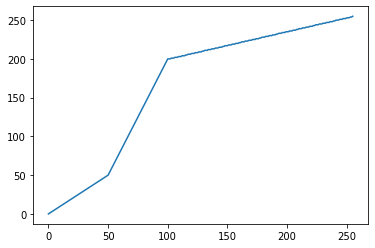

In [ ]:
#그래프가 맞는지 시각화해보기(0,0)->(50,50)->(100,200)
plt.plot(trans_f)

In [ ]:
height, width = img.shape
res = np.zeros((height, width), dtype='uint8')
trans_f = np.zeros(256, dtype='uint8')

# Contrast stretching
# (50, 50) & (100, 200)
for i in range(256):
    if(i < 50):
        trans_f[i] = i
    elif(i < 100):
        trans_f[i] = 3*i - 100
    else:
        trans_f[i] = 55 / 155 * (i-100) + 200
        
for i in range(height):
    for j in range(width):
        res[i, j] = trans_f[img[i, j]]

plt.plot(trans_f)

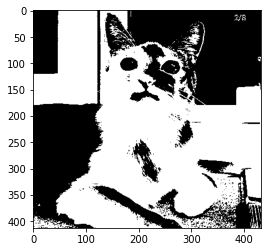

In [ ]:
#Gray-level slicing(100<i<200, -> 200)
height, width = img.shape
res = np.zeros((height, width), dtype='uint8')
trans_f = np.zeros(256, dtype='uint8')



for i in range(256):
    if(100<i < 200):
        trans_f[i] = 200
        
for i in range(height):
    for j in range(width):
      res[i, j] = trans_f[img[i, j]]
        
plt.imshow(res, cmap='gray')

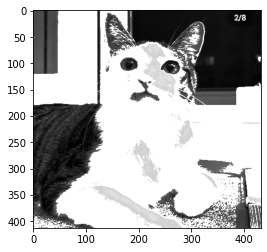

In [ ]:
#Gray-level slicing(100<i<200, -> 200)
height, width = img.shape
res = np.zeros((height, width), dtype='uint8')
trans_f = np.zeros(256, dtype='uint8')


####################################################
for i in range(256):
    if(100<i < 200):
      trans_f[i] = 250
    else:
      trans_f[i] = i
####################################################
        
for i in range(height):
    for j in range(width):
      res[i, j] = trans_f[img[i, j]]
        
plt.imshow(res, cmap='gray')

In [ ]:
img.shape

(413, 432)

In [ ]:
img

array([[ 70,  71,  71, ...,  11,  11,  10],
       [ 70,  71,  71, ...,  12,  10,  11],
       [ 71,  70,  71, ...,  13,  10,  11],
       ...,
       [147,  99,  88, ...,  94,  82, 104],
       [141, 110, 138, ...,  97,  87, 105],
       [154, 157, 139, ..., 102,  95, 110]], dtype=uint8)

In [ ]:
#numpy 배열 내 고유한 원소 별 개수 
unique, counts = np.unique(img, return_counts=True)

In [ ]:
dict(zip(unique, counts))

{0: 57,
 1: 156,
 2: 234,
 3: 289,
 4: 568,
 5: 528,
 6: 695,
 7: 759,
 8: 1156,
 9: 1747,
 10: 2358,
 11: 2527,
 12: 3048,
 13: 3563,
 14: 2969,
 15: 2799,
 16: 1913,
 17: 1544,
 18: 842,
 19: 605,
 20: 571,
 21: 689,
 22: 687,
 23: 467,
 24: 421,
 25: 491,
 26: 439,
 27: 451,
 28: 502,
 29: 473,
 30: 644,
 31: 612,
 32: 493,
 33: 452,
 34: 472,
 35: 489,
 36: 450,
 37: 477,
 38: 500,
 39: 560,
 40: 640,
 41: 467,
 42: 408,
 43: 425,
 44: 446,
 45: 415,
 46: 421,
 47: 547,
 48: 559,
 49: 385,
 50: 344,
 51: 321,
 52: 378,
 53: 361,
 54: 323,
 55: 337,
 56: 461,
 57: 529,
 58: 410,
 59: 353,
 60: 333,
 61: 383,
 62: 359,
 63: 342,
 64: 348,
 65: 385,
 66: 449,
 67: 373,
 68: 329,
 69: 384,
 70: 442,
 71: 445,
 72: 506,
 73: 759,
 74: 967,
 75: 788,
 76: 592,
 77: 490,
 78: 477,
 79: 587,
 80: 577,
 81: 675,
 82: 794,
 83: 849,
 84: 819,
 85: 724,
 86: 684,
 87: 711,
 88: 644,
 89: 595,
 90: 623,
 91: 692,
 92: 693,
 93: 527,
 94: 553,
 95: 490,
 96: 537,
 97: 510,
 98: 533,
 99: 561,
 

In [ ]:
dict(zip(unique, counts))

In [ ]:
cnt_uniq_dict = dict(zip(unique, counts))

In [ ]:
#값 기준 오름 차순 정렬
sorted(cnt_uniq_dict.items(), key = lambda x:x[1]) 

[(226, 4),
 (225, 15),
 (223, 54),
 (0, 57),
 (224, 58),
 (222, 82),
 (221, 113),
 (220, 147),
 (1, 156),
 (219, 166),
 (218, 198),
 (2, 234),
 (214, 243),
 (217, 243),
 (3, 289),
 (215, 290),
 (213, 292),
 (51, 321),
 (54, 323),
 (68, 329),
 (60, 333),
 (212, 336),
 (55, 337),
 (63, 342),
 (50, 344),
 (64, 348),
 (59, 353),
 (62, 359),
 (53, 361),
 (67, 373),
 (52, 378),
 (61, 383),
 (69, 384),
 (49, 385),
 (65, 385),
 (216, 387),
 (211, 393),
 (42, 408),
 (209, 409),
 (58, 410),
 (45, 415),
 (210, 416),
 (24, 421),
 (46, 421),
 (43, 425),
 (26, 439),
 (70, 442),
 (71, 445),
 (44, 446),
 (66, 449),
 (36, 450),
 (27, 451),
 (33, 452),
 (56, 461),
 (23, 467),
 (41, 467),
 (34, 472),
 (29, 473),
 (37, 477),
 (78, 477),
 (205, 478),
 (107, 482),
 (108, 485),
 (35, 489),
 (77, 490),
 (95, 490),
 (25, 491),
 (32, 493),
 (204, 493),
 (38, 500),
 (208, 501),
 (28, 502),
 (72, 506),
 (97, 510),
 (201, 511),
 (202, 515),
 (106, 518),
 (114, 525),
 (93, 527),
 (5, 528),
 (57, 529),
 (199, 530),


In [ ]:
#numpy 배열을 pandas series로 변환해 고유한 원소별 개수로 구하고 정렬하기 
#converting 1D array to pandas Series, and value_counts(), sort_values()

#1D : img_arr = pd.Series(img)

img_arr = pd.DataFrame(img)
img_arr.head()

,0,1,2,3,4,5,6,7,8,9,...,422,423,424,425,426,427,428,429,430,431
0,70,71,71,70,70,71,70,70,70,69,...,11,11,9,10,11,11,11,11,11,10
1,70,71,71,72,71,71,70,69,71,70,...,11,9,8,10,11,12,12,12,10,11
2,71,70,71,71,70,71,69,69,71,72,...,12,10,9,10,9,9,12,13,10,11
3,73,73,72,72,72,72,70,70,73,73,...,11,10,9,9,8,8,9,10,10,12
4,74,74,74,73,72,72,70,70,72,72,...,10,10,9,9,8,11,9,9,10,10


In [ ]:
np.

In [ ]:
#Histogram equalization 

height, width = img.shape
res = np.zeros((height, width), dtype='uint8')
trans_f = np.zeros(256, dtype='uint8')

#input gray level: gray level의 개수    #unique, counts 
#input gray level/ Max gray level= 255
#Pr = counts/전체개수  img.shape = (413, 432)
# 

#for i in range(256):
for i in range(unique, counts):
    if(i < 100):
        trans_f[i] = 0
    else:
        trans_f[i] = i
        
for i in range(height):
    for j in range(width):
      res[i, j] = trans_f[img[i, j]]
        
plt.imshow(res, cmap='gray')

TypeError: ignored

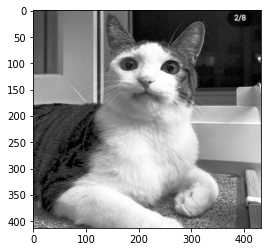

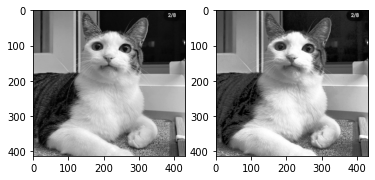

In [ ]:
#Histgram equalization
height, width = img.shape
res = np.zeros((height, width), dtype='uint8')
trans_f = np.zeros(256, dtype='uint8')
histogram = np.zeros(256, dtype =float)


##########################CDF누적분포곡선########

###Step1. Histrogram 
for i in range(height):
  for j in range(width):
    histogram[img[i,j]] = histogram[img[i,j]] + 1 #nk : input gray level별 counting 


###Step2. CDF(누적분포곡선)
pdf = histogram / (width* height) #픽셀의 전체 개수:hegith*width  # historgram/전체 = Pr(PDF)
cdf = np.zeros(256, dtype = float) #CDFCDF2 = CDF0+ CDF1의 합 
cdf[0] = pdf[0]  #첫번째는 선언해줌 

# 1부터 루프 돌려서 CDF(Sk)
for i in range(1, 256):
  cdf[i] = cdf[i-1] + pdf[i]

trans_f = np.round(255 * cdf)  #round(Sk * Max gray level)
"""
#최대값을 곱한 후 반올림 
cdf = np.round(255* cdf) 
"""
#######################################################



for i in range(height):
    for j in range(width):
      res[i, j] = trans_f[img[i, j]]

plt.imshow(res, cmap='gray')


f, axarr = plt.subplots(1,2)
axarr[0].imshow(img, cmap='gray')
axarr[1].imshow(res, cmap='gray')  #오른쪽이 더 선명한 걸 알 수 있다. 

In [ ]:
#gobal gistogram equation 

#평탄한 부분이 많으면 -> 카운팅이 많이 됨 --> 누적했을때, 차이가 크게됨 -> 그래프가 날카로운 곡선이됨 (조그만 차이에서-> 큰 차이가 됨)
#평탄한 부분이 엄청 자글자글하게 됨 
#해결하기 위해 local적으로 처리하는방법이 있음

#가장 널리 쓰이는 방법은 

In [ ]:
#CLAHE(Contrast Limited Adaptive Histogram Equalization) -> histogram modification 
#HE(Histogrme equalization) 문제점: 평탄한 부분에 과도한 노이즈 증폭
#과도하게 나온 부분을 잘라서 전체 히스토그램에 고르게 분포 


#Histgram modificatio/ CLAHE
height, width = img.shape
res = np.zeros((height, width), dtype='uint8')
trans_f = np.zeros(256, dtype='uint8')
histogram = np.zeros(256, dtype =float)


##########################Contrast Limited Adaptive Histogram Equalization(CLAHE)########
###Step1. Initial histogram
limited_function = 0.1
def initial_hist_area(height, width):
  for i in range(height):
    for j in range(width):
      if (i > limited_function):
        trans_f[i] = i - height 
      else:
        trans_f[i] = 0 

for i in initial_hist_area(256):
    if(i > limited_function):
      trans_f[i] = 250
    else:
      trans_f[i] = i        

#평탄화
#initial_histogram[img[i,j]] = histogram[img[i,j]] + initial_hist(img[i,j])/255
initial_histogram = initial_hist_area(img[i,j])/256

pdf = histogram / (width* height)
#initial_histogram = histogram[img[i,j]] + initial_hist(img[i,j])/255
cdf = pdf + initial_histogram

###Step2. CLAHE histogram 
for i in range(height):
  for j in range(width):
    histogram[img[i,j]] = histogram[img[i,j]] + 1


###Step3. CDF(누적분포곡선) + initial_hist width값에 따라 더하기 
pdf = histogram / (width* height) #픽셀의 전체 개수:hegith*width  # historgram/전체 = Pr(PDF)
cdf = np.zeros(256, dtype = float) #CDFCDF2 = CDF0+ CDF1의 합 
cdf[0] = pdf[0]

for i in range(1, 256):
  cdf[i] = cdf[i-1] + pdf[i]

trans_f = np.round(255 * cdf)  #round(Sk * Max gray level)
"""
#최대값을 곱한 후 반올림 
cdf = np.round(255* cdf) 
"""
#######################################################


for i in range(height):
    for j in range(width):
      res[i, j] = trans_f[img[i, j]]

plt.imshow(res, cmap='gray')


f, axarr = plt.subplots(1,2)
axarr[0].imshow(img, cmap='gray')
axarr[1].imshow(res, cmap='gray')  #오른쪽이 더 선명한 걸 알 수 있다. 

TypeError: ignored

In [ ]:
# CLAHE
height, width = img.shape
res = np.zeros((height, width), dtype='uint8')
trans_f = np.zeros(256, dtype='uint8')
histogram = np.zeros(256, dtype=float)

Th = 0.005
# Step 1. Histogram
for i in range(height):
    for j in range(width):
            histogram[img[i, j]] = histogram[img[i, j]] + 1
pdf = histogram / (width * height)

# Step 2. Histogram modification
sum = 0
for i in range(256):
    if(pdf[i] > Th):
        sum = sum + (pdf[i] - Th)
        pdf2[i] = Th
    else:
        pdf2[i] = pdf[i]
pdf2 = pdf2 + sum/256.0

cdf = np.zeros(256, dtype=float)
cdf[0] = pdf2[0]
for i in range(1, 256):
    cdf[i] = cdf[i-1] + pdf2[i]
trans_f = np.round(255 * cdf)

for i in range(height):
    for j in range(width):
        res[i, j] = trans_f[img[i, j]]

f, axarr = plt.subplots(1,2) 
axarr[0].stem(pdf)
axarr[0].set(xlim=(0, 255), ylim=(0, 0.012))
axarr[1].stem(pdf2)
axarr[1].set(xlim=(0, 255), ylim=(0, 0.012))

NameError: ignored

In [ ]:
def CLAHE(img, th):
    height, width = img.shape
    res = np.zeros((height, width), dtype='uint8')
    cnt = np.zeros(256, dtype='uint8')   # 256개의 dimension을 가진 array

    histogram = np.zeros(256, dtype='uint8')

    # step1. Histogram
    for i in range(height):
        for j in range(width):
            histogram[img[i,j]] += 1

    # step2. CDF
    pdf = histogram/(width * height)

    area = 0

    for i in range(256):
        if (pdf[i] > th):
            area += (pdf[i] - th)
            pdf[i] = th
        else:
            pdf[i] = pdf[i]

    pdf += area/256

    cdf = np.zeros(256, dtype=float)

    cdf[0] = pdf[0]
    for i in range(1, 256):
        cdf[i] = pdf[i] + cdf[i-1]

    trans_f = np.round(cdf * 255)

    for i in range(height):
        for j in range(width):
            res[i,j] = trans_f[img[i,j]]
            
    return pdf, cdf, res

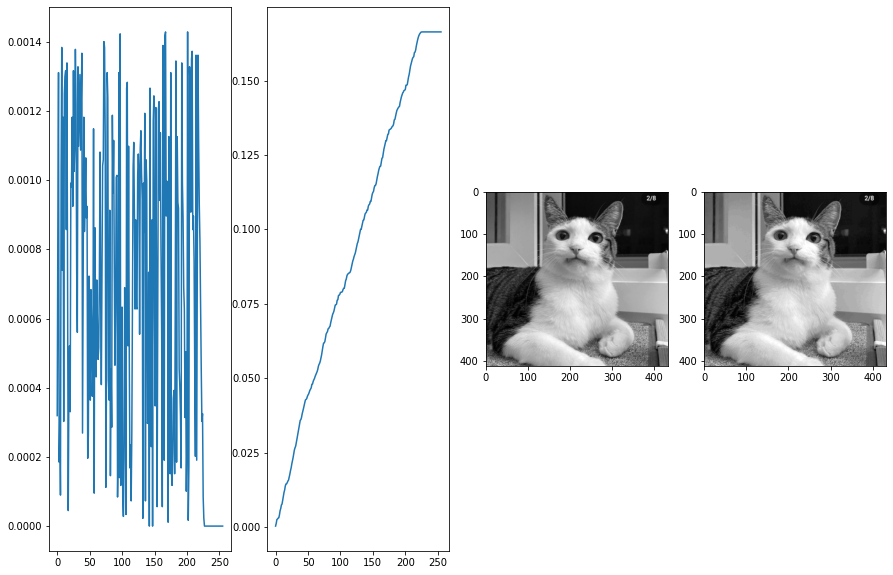

In [ ]:
f, axarr = plt.subplots(1,4, figsize=(15,10))
axarr[0].plot(CLAHE(img, 0.008)[0])
axarr[1].plot(CLAHE(img, 0.008)[1])

axarr[2].imshow(img, cmap='gray')
axarr[3].imshow(CLAHE(img, 0.008)[2], cmap='gray')

IndexError: ignored

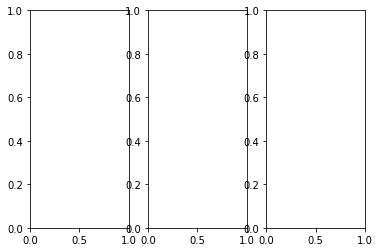

In [ ]:
#공용 함수 사용(빠르고, 최적화가 잘 되어 있으나, cutomizing이 안되는 단점이 있다. 
    
res_HE= cv2.equalizeHist(img)
clahe =cv2.createCLAHE(clipLimit=2.0)
res_CLAHE = clahe.apply(img)

#clahe = cv2.createCLAHE(clipLimit = 0.2, tileGridSize=(8,8))

f.axarr = plt.subplots(1,3)
axarr[0].imshow(img, cmap='gray')
axarr[1].imshow(res_HE, cmap='gray')
axarr[2].imshow(res_CLAHE, cmap='gray')


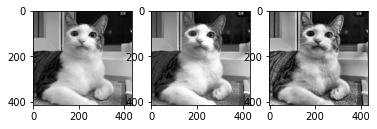

In [ ]:
# 공용함수 사용
##공용 함수 사용(빠르고, 최적화가 잘 되어 있으나, cutomizing이 안되는 단점이 있다.  
res_HE = cv2.equalizeHist(img)
clahe = cv2.createCLAHE(clipLimit=2.0)
res_CLAHE = clahe.apply(img)

f, axarr = plt.subplots(1,3) 
axarr[0].imshow(img, cmap='gray')
axarr[1].imshow(res_HE, cmap='gray')
axarr[2].imshow(res_CLAHE, cmap='gray')

In [ ]:
#[1]filter2D 함수를 사용하여 gradient 구하기
#[2]가로/세로 방향에 대한 abs(gradient) 뿌려보기
#[3]magnitude 계산하기

#https://gaussian37.github.io/vision-concept-edge_detection/
#https://sbme-tutorials.github.io/2018/cv/notes/4_week4.html


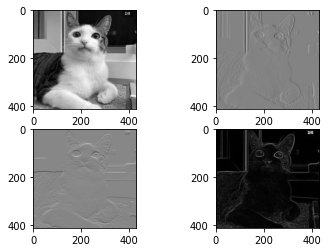

In [ ]:
#gradient edge detection 

img = img.astype(float)

# Kernel 정의
kernel_v = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=float);
kernel_h = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=float);

# Gradient 계산 (Filtering 수행)
edge_v = cv2.filter2D(img, -1, kernel_v);
edge_h = cv2.filter2D(img, -1, kernel_h);

# Magnitude 계산
mag = np.sqrt(edge_v**2 + edge_h**2)

# 시각화
f, axarr = plt.subplots(2,2) 
axarr[0][0].imshow(img, cmap='gray')
axarr[0][1].imshow(edge_v, cmap='gray')
axarr[1][0].imshow(edge_h, cmap='gray')
axarr[1][1].imshow(mag, cmap='gray')

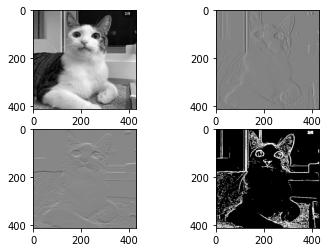

In [ ]:

#magnitute 계산
mag = np.sqrt(edge_v**2 + edge_h **2)

#Threshodling
Th = 100
for i in range(height):
  for j in range(width):
    if(mag[i,j] > Th):
      mag[i, j] = 255
    else:
      mag[i,j] = 0


# 시각화
f, axarr = plt.subplots(2,2) 
axarr[0][0].imshow(img, cmap='gray')
axarr[0][1].imshow(edge_v, cmap='gray')
axarr[1][0].imshow(edge_h, cmap='gray')
axarr[1][1].imshow(mag, cmap='gray')

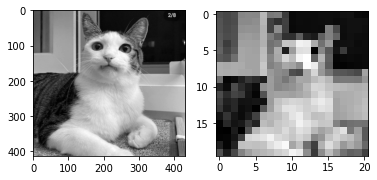

In [ ]:
#image_resizing(사이즈 줄이기)
#nearest neighbor 
height, width = img.shape

scale = 0.05 #scale의 역수: 원본영상의 위치 파악 ?
#re_height = np.round(scale * height) #영상 사이즈는 정수가 아니면 안되므로 round처리 
re_height = (int)(scale*height) #scale이 소수점이라 -> int(정수로 형변환을 함)
re_width = (int)(scale * width)
res = np.zeros((re_height, re_width), dtype='uint8')

for i in range(re_height):
  for j in range(re_width):
    pi = (int)(np.round(i / scale))
    pj = (int)(np.round(j / scale))
    res[i,j] = img[pi, pj]

#반올림, 소숫점 자리는 존재하지 않기 때문에에
#입력영상의 좌표가 출력영상으로 가는게 아니라
#출력영상의 좌표가 어디에서 오는지 생각해야함 

f, axarr = plt.subplots(1,2) 
axarr[0].imshow(img, cmap='gray')
axarr[1].imshow(res, cmap='gray')


In [ ]:
#가로, 세로어떻게 적용해야되는지? 

#영상 입력 및 출력
img = scale_x
img = 



In [ ]:
#사이즈 확대하기 
#nearest neighbor 
height, width = img.shape

scale_x, scale_y = 2,2

#re_height = np.round(scale * height) #영상 사이즈는 정수가 아니면 안되므로 round처리 
re_height = (int)(scale*height) #scale이 소수점이라 -> int(정수로 형변환을 함)
re_width = (int)(scale * width)
res = np.zeros((re_height, re_width), dtype='uint8')

for i in range(re_height):
  for j in range(re_width):
    pi = (int)(np.round(i / scale))  #floor 소숫점 이하 버림림
    pj = (int)(np.round(j / scale))
    res[i,j] = img[pi, pj]

#반올림, 소숫점 자리는 존재하지 않기 때문에에
#입력영상의 좌표가 출력영상으로 가는게 아니라
#출력영상의 좌표가 어디에서 오는지 생각해야함 

f, axarr = plt.subplots(1,2) 
axarr[0].imshow(img, cmap='gray')
axarr[1].imshow(res, cmap='gray')


In [ ]:
#사이즈 확대하기 (다운사이즈된 이미지로 테스트)
#nearest neighbor 

img = cv2.imread('downsize.png')
img = cv2.cvtColor(img, 'BGR2GRAY')
height, width = img.shape

scale_x, scale_y = 10,10

#re_height = np.round(scale * height) #영상 사이즈는 정수가 아니면 안되므로 round처리 
re_height = (int)(scale*height) #scale이 소수점이라 -> int(정수로 형변환을 함)
re_width = (int)(scale * width)
res = np.zeros((re_height, re_width), dtype='uint8')

for i in range(re_height): #확대할 영상에 대한 좌표 (scale값이 10이므로, 10이하의 pixel에서는 )
  for j in range(re_width):
    pi = (int)(np.floor(i / scale_y))  #정수로 안 나눠떨어져서, floor 소숫점 이하 버리고 int처리
    pj = (int)(np.floor(j / scale_x))
    res[i,j] = img[pi, pj]

#반올림, 소숫점 자리는 존재하지 않기 때문에에
#입력영상의 좌표가 출력영상으로 가는게 아니라
#출력영상의 좌표가 어디에서 오는지 생각해야함 

f, axarr = plt.subplots(1,2) 
axarr[0].imshow(img, cmap='gray')